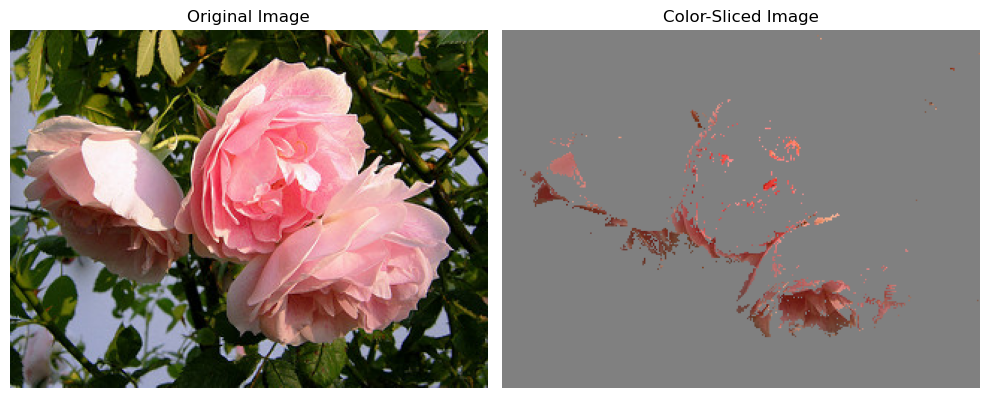

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


"""
COLOR SLICING

Color slicing is a technique used in image processing to highlight or separate specific ranges of colors within an image. This technique is particularly useful for isolating certain objects or regions of interest from their background, based on color information. The basic idea is to either:

1. Display the colors of interest so that they stand out from the background.
2. Use the region defined by the selected colors as a mask for further processing (e.g., object extraction).

Color slicing is often implemented by converting an image to a different color space, such as the HSV (Hue, Saturation, Value) color space, where colors are more easily separable compared to the RGB space. In HSV, colors are represented by their hue (the actual color), saturation (the intensity of the color), and value (the brightness of the color).

The approach generally involves the following steps:
1. **Convert the image to HSV**: Convert the original image from its native RGB (Red, Green, Blue) color space to HSV.
2. **Define color bounds**: Specify the lower and upper bounds of the color range you are interested in. These bounds can be defined for the hue, saturation, and value channels separately.
3. **Create a mask**: Create a binary mask that identifies the pixels within the defined color range. Pixels inside this range are assigned a value of 1 (or 255), and all other pixels are assigned a value of 0.
4. **Apply the mask**: Extract the region of interest (ROI) from the image using the mask, which keeps only the pixels of interest and replaces the rest with a neutral color (e.g., gray).

This technique can be used for various applications such as:
- **Object detection**: Extracting specific objects from an image based on their color.
- **Background subtraction**: Removing or masking the background of an image.
- **Image segmentation**: Segmenting an image into different regions based on color properties.

Example:
In the example provided, a color-slicing technique is applied to highlight the red regions in an image (e.g., a rose). The region of interest is specified by defining the lower and upper bounds of red color in the HSV space. The pixels within the specified range are kept, and all other pixels are replaced with a neutral gray color.

This method is simple and effective but may need adjustments in color bounds to account for different lighting conditions and variations in the object being detected.

This process can be extended for more complex color manipulations and combined with other techniques to perform more advanced image processing tasks.

"""


def color_slicing(image_path, lower_bound, upper_bound):
    # Load the image
    original = cv2.imread(image_path)
    
    # Convert image to RGB
    original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
    
    # Convert image to HSV (Hue, Saturation, Value) color space
    hsv_image = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)
    
    # Create a mask based on the color range
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
    
    # Create an inverse mask
    inverse_mask = cv2.bitwise_not(mask)
    
    # Extract the region of interest (ROI) from the image using the mask
    result_image = cv2.bitwise_and(original_rgb, original_rgb, mask=mask)
    
    # Replace non-selected regions with a neutral color (gray)
    neutral_image = np.full_like(original_rgb, (128, 128, 128))  # Gray
    non_selected = cv2.bitwise_and(neutral_image, neutral_image, mask=inverse_mask)
    
    # Combine the selected regions and the neutral regions
    final_result = cv2.add(result_image, non_selected)
    
    # Plot the original and the color-sliced images
    plt.figure(figsize=(10, 5))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis('off')
    
    # Display color-sliced image
    plt.subplot(1, 2, 2)
    plt.imshow(final_result)
    plt.title("Color-Sliced Image")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Path to the 'roses.jpg' image in the 'data/images' folder
image_folder = 'data/images'
image_file = 'roses.jpg'
image_path = os.path.join(image_folder, image_file)

# Check if the file exists
if os.path.exists(image_path):
    # Define the color range (HSV space) for red color
    # Lower and upper bounds of red in HSV space
    lower_red = np.array([0, 100, 100])  # Lower bound for red
    upper_red = np.array([10, 255, 255])  # Upper bound for red

    # Call the function to perform color slicing
    color_slicing(image_path, lower_red, upper_red)
else:
    print(f"Error: The image '{image_file}' was not found in the folder '{image_folder}'.")
